In [182]:
import sys
sys.path.append("..")

import Essentials

In [183]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [184]:
a = np.load('Data_First.npz', allow_pickle=True)

In [185]:
x1 = a['X_test_2']
x2 = a['X_train_2']

y1 = a['Y_test_2']
y2 = a['Y_train_2']

In [186]:
timestamp1 = y1[:, 1]
timestamp2 = y2[:, 1]

y1 = y1[:, 0].reshape(len(y1), 1)
y1 = y1.astype(np.float64)
y2 = y2[:, 0].reshape(len(y2), 1)
y2 = y2.astype(np.float64)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5196\3146428066.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y1 = y1.astype(np.float64)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5196\3146428066.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y2 = y2.astype(np.float64)


In [187]:
x1

array([[9.505000e+01, 3.865000e+01, 0.000000e+00, ..., 1.883000e+01,
        5.064000e+01, 5.250306e+04],
       [9.547000e+01, 3.685000e+01, 0.000000e+00, ..., 1.837000e+01,
        4.995000e+01, 5.365576e+04],
       [8.780000e+01, 7.840000e+00, 1.500000e-01, ..., 1.822000e+01,
        4.490000e+01, 5.332455e+04],
       ...,
       [1.024300e+02, 0.000000e+00, 0.000000e+00, ..., 1.473000e+01,
        5.277000e+01, 5.231245e+04],
       [1.230200e+02, 0.000000e+00, 0.000000e+00, ..., 1.474000e+01,
        5.205000e+01, 5.133461e+04],
       [8.214000e+01, 0.000000e+00, 1.053000e+01, ..., 1.472000e+01,
        4.386000e+01, 5.118371e+04]])

In [188]:
y1

array([[ 78.4],
       [ 97.7],
       [ 89.6],
       [ 76.2],
       [ 88.8],
       [ 78.1],
       [ 82.7],
       [ 77.6],
       [ 79.5],
       [ 77.1],
       [ 83.5],
       [ 81.1],
       [ 73.9],
       [ 88.1],
       [ 86.2],
       [ 82.3],
       [ 89.3],
       [ 77.9],
       [ 83.5],
       [ 83.5],
       [ 94.9],
       [ 89.3],
       [ 75.2],
       [ 82.8],
       [ 97.8],
       [ 82.3],
       [ 84.9],
       [100.4],
       [ 84.6],
       [ 92.3],
       [ 88.7],
       [ 84.1],
       [ 85.3],
       [105.7],
       [ 80.2]])

In [189]:
y1.shape

(35, 1)

In [190]:
x2.shape

(75, 47)

In [191]:
y2.shape

(75, 1)

In [192]:
x1.shape

(35, 47)

In [193]:
class TestSoftSensor(Essentials.SoftSensor):
    def __init__(self, x_train, y_train):
        super().__init__('Test')
        self.x_scaler = StandardScaler() 
        self.y_scaler = StandardScaler()
        self.x_scaler.fit(x_train)
        self.y_scaler.fit(y_train)
        self.train(x_train, y_train)

    def prepocessing(self, x):
        try:
            return self.x_scaler.transform(x)
        except:
            try:
               return self.y_scaler.transform(x)
            except BaseException as err:
                print("Ошибка скейлера")
                raise err

            
    def postprocessing(self, x):
        try:
            return self.x_scaler.inverse_transform(x)
        except:
            try:
               return self.y_scaler.inverse_transform(x)
            except BaseException as err:
                print("Ошибка скейлера")
                raise err


    def evaluate_model(self, x):
        predictions = self.get_model().predict(x)
        return predictions

    def train(self, x_train, y_train):
        X_train_scaled = self.x_scaler.fit_transform(x_train)
        y_train_scaled = self.y_scaler.fit_transform(y_train)
        regressor = LinearRegression()
        regressor.fit(X_train_scaled, y_train_scaled)
        self.set_model(regressor)
        
    def __str__(self):
        coefficients = self.get_model().coef_   
        return (f"Линейная регрессия, коэффициенты: {coefficients}")

In [194]:
Test_sensor_1 = TestSoftSensor(x2, y2)

In [195]:
print(Test_sensor_1)

Линейная регрессия, коэффициенты: [[-2.52036428e+00 -1.44415873e-01  1.42980968e-01 -7.44679564e-01
  -5.58221433e-02  2.82445030e+00 -9.15724617e+00  6.09002160e+00
   8.57049722e-01 -2.32425094e+00  2.90794730e+00  3.05752361e+00
   9.67006226e-01 -4.46309656e-14 -4.15542455e-02 -6.35820427e+00
   1.15480540e+00  2.70455163e+00 -3.17048523e-01  1.15174001e+00
   4.35147287e-01 -1.13282449e+00  7.67681458e-01 -2.39821489e-02
   1.21498423e-02  3.80132293e-01  2.36217483e-01 -2.59275395e-01
   5.28740700e-01  3.66421866e-01 -1.55855385e+00  1.29300735e-01
   6.91455289e-02 -4.27739383e-01  9.46399828e-02 -3.96406244e-01
   3.31890585e-03  9.99031348e-02  4.07520478e-03  1.94015066e-01
   2.36217483e-01  2.42977230e+00 -3.44290612e-02 -9.81607625e-05
  -2.56776755e-01 -4.17886688e+00  6.99807828e-01]]


In [196]:
metric = Essentials.R2Metric()

In [197]:
test_visual = Essentials.Visualizer(x1, y1, timestamp1, [metric], 'Test SoftSensor R2 metric')

In [198]:
Test_sensor_1.test(x1, y1, metric)

(array([[-929.93108705],
        [-860.09375154],
        [-109.10219639],
        [  90.18752799],
        [  78.09361471],
        [  75.92019555],
        [  65.29025293],
        [  84.90352758],
        [  41.75134784],
        [  55.62719432],
        [  61.7999654 ],
        [  56.20291425],
        [  79.7687722 ],
        [ 101.72146212],
        [ 332.66455417],
        [  65.48570932],
        [  98.66137914],
        [  82.45460932],
        [  93.67671291],
        [ 106.54411664],
        [  81.09324377],
        [  90.35416586],
        [  76.1976894 ],
        [  73.79460856],
        [  89.94587348],
        [  75.32779498],
        [  82.96560477],
        [  96.6931634 ],
        [ 105.78940894],
        [ 101.63606501],
        [  96.66200638],
        [  82.18734083],
        [  88.03659227],
        [ 140.24090644],
        [ 101.06286087]]),
 -1077.1794386689985)

      Coefficient of determination
Test                  -1077.179439


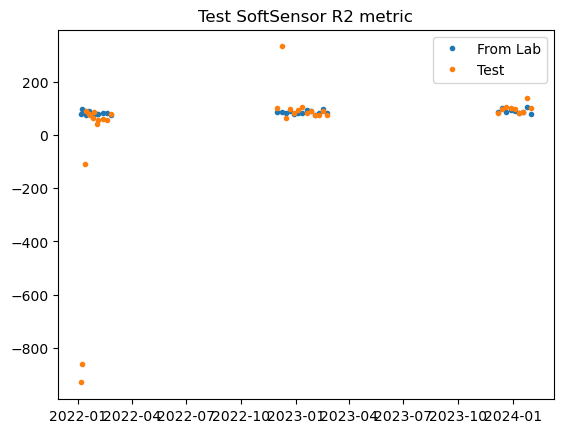

In [199]:
test_visual.visualize([Test_sensor_1])